<a href="https://colab.research.google.com/github/kyishanz/python-tutorials/blob/main/4_SharpeningEdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2b: Sharpening and Edge Detection

First, we'll look at an image, and try to sharpen it up. We'll then try to detect the edges using a Canny edge detector. 

## Part 1.

1. Read in the image "hyena.jpg". Double check with the original image to make sure it is loaded properly!

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


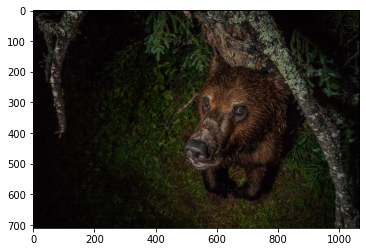

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import cv2 

from google.colab import drive
drive.mount('/content/drive')

# Load a color image
img = cv2.imread('/content/drive/MyDrive/AI4ALL 2022/Day 4/hyena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

2. Blur the image. Now subtract the blurred image from the original, and display the difference. 

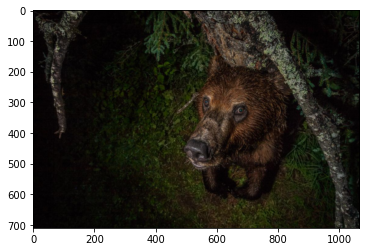

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


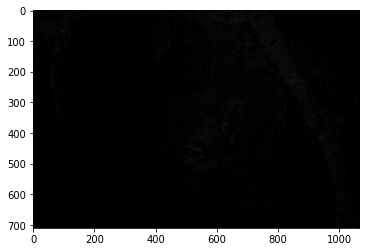

In [25]:
kernel_size = (3,3)
blurred_img = cv2.GaussianBlur(img, kernel_size, 0)

plt.imshow(blurred_img)
plt.show()

blur_difference = img.astype(int) - blurred_img
plt.imshow(blur_difference)
plt.show()

3. Add the difference back to the original image. Can you sharpen the image this way?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


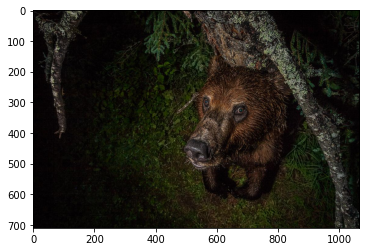

In [26]:
sharp_sum_img = img + blur_difference
# np.clip(sharp_sum_img, 0, 255)
# print(sharp_sum_img)
plt.imshow(sharp_sum_img)
plt.show()

4. Now try an OpenCV technique to directly sharpen the image. What parameters can you adjust to improve this effect? 

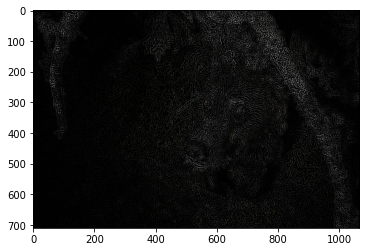

In [33]:
dst = cv2.Laplacian(blurred_img, ddepth=-2, ksize=3)

abs_dst = cv2.convertScaleAbs(dst)
plt.imshow(abs_dst)
plt.show()

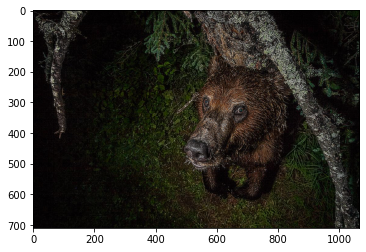

In [28]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
img_kernel_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
plt.imshow(img_kernel_sharp)
plt.show()

Try 1-4 again with "spongebob.png" or another image! Is it better or worse? Why?

## Part 2.

1. For the same image, can you detect the edges using the Canny function in the CV2 library?

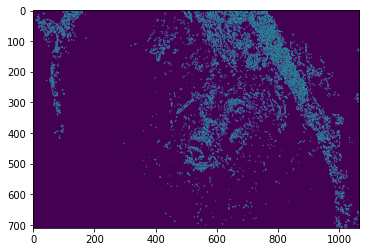

In [40]:
edges = cv2.Canny(img,200,255)
plt.imshow(edges)
plt.show()

## Supplementary Exercises 

This section contains additional image-manipulation exercises which will be helpful to you down the road. 

1. **Rotating images**: 

Does OpenCV2 have any functions that can rotate images 90 degrees? Try it out!


What if I want to rotate 45 degrees? check out the OpenCV function getRotationMatrix2D() and warpAffine. How does it work? Print out the rotation matrix and try it out!

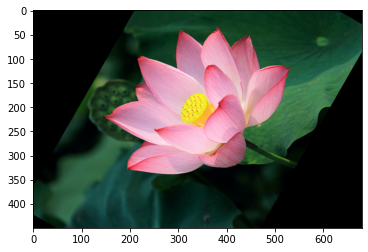

In [48]:
lotus = cv2.imread('/content/drive/MyDrive/AI4ALL 2022/Day 4/lotus.jpg')
lotus = cv2.cvtColor(lotus, cv2.COLOR_BGR2RGB)

height, width = lotus.shape[:2]
center = (width/2, height/2)

rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=60, scale=1)

rotated_image = cv2.warpAffine(src=lotus, M=rotate_matrix, dsize=(width, height))

plt.imshow(rotated_image)
plt.show()

2. **Template matching**: this is a procedure which is closely related to 2D convolution. We have provided for you the images "beatles.jpg" and "one_beatle.png". The first is the original image and the second is a template image. Your objective is to use OpenCV tools to match that template to the original image. Check out the function matchTemplate() and the tutorial:

https://docs.opencv.org/3.1.0/d4/dc6/tutorial_py_template_matching.html

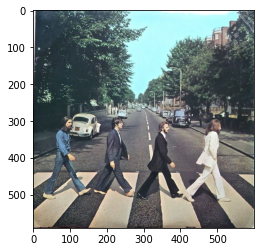

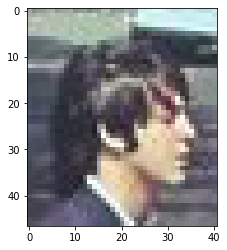

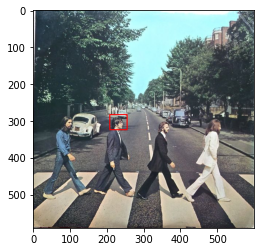

In [56]:
original = cv2.imread('/content/drive/MyDrive/AI4ALL 2022/Day 4/beatles.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

template = cv2.imread('/content/drive/MyDrive/AI4ALL 2022/Day 4/one_beatle.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

plt.imshow(original)
plt.show()

plt.imshow(template)
plt.show()

w, h = template.shape[:2]

method = cv2.TM_CCOEFF

original = original.copy()

res = cv2.matchTemplate(original, template, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(original,top_left, bottom_right, 255, 2)

plt.imshow(original)
plt.show()

3. **Perspective**: read in the image "sudoku.png". For this part, we'll follow the tutorial given here:

https://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html

Repeat their process to take the sudoku image and perform a perspective warp such that we only see the corrected Sudoku puzzle. 

(423, 419, 3)


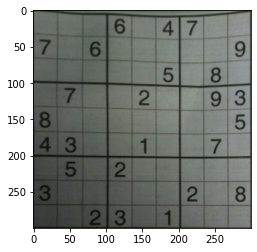

In [57]:
sudoku = cv2.imread('/content/drive/MyDrive/AI4ALL 2022/Day 4/sudoku.jpg')
sudoku = cv2.cvtColor(sudoku, cv2.COLOR_BGR2RGB)

print(sudoku.shape)
rows, cols, ch = sudoku.shape

#getting corresponding points on img 1 and img 2 (i.e. i want these 4 points on img1 to become those 4 points on img 2)
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
#img2: transformed image
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

#transformation matrix for the points
M = cv2.getPerspectiveTransform(pts1,pts2)

#warping perspective with transformation matrix
warped_sudoku = cv2.warpPerspective(sudoku, M, (300,300))

plt.imshow(warped_sudoku)
plt.show()